In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown https://drive.google.com/uc?id=1-3zb9013ywiNwxwO1Y8Ukh3pMxk4jYWL&export=download

Downloading...
From: https://drive.google.com/uc?id=1-3zb9013ywiNwxwO1Y8Ukh3pMxk4jYWL
To: /content/images.zip
100% 356k/356k [00:00<00:00, 59.3MB/s]


In [ ]:
!unzip images.zip

Archive:  images.zip
   creating: Dataset/CS114/Digits/images_/
   creating: Dataset/CS114/Digits/images_/0/
 extracting: Dataset/CS114/Digits/images_/0/0.png  
 extracting: Dataset/CS114/Digits/images_/0/1.png  
 extracting: Dataset/CS114/Digits/images_/0/3.png  
   creating: Dataset/CS114/Digits/images_/9/
 extracting: Dataset/CS114/Digits/images_/9/1.png  
 extracting: Dataset/CS114/Digits/images_/9/2.png  
 extracting: Dataset/CS114/Digits/images_/9/3.png  
   creating: Dataset/CS114/Digits/images_/5/
 extracting: Dataset/CS114/Digits/images_/5/1.png  
 extracting: Dataset/CS114/Digits/images_/5/2.png  
 extracting: Dataset/CS114/Digits/images_/5/3.png  
 extracting: Dataset/CS114/Digits/images_/5/4.png  
 extracting: Dataset/CS114/Digits/images_/5/5.png  
 extracting: Dataset/CS114/Digits/images_/5/6.png  
 extracting: Dataset/CS114/Digits/images_/5/7.png  
 extracting: Dataset/CS114/Digits/images_/5/8.png  
 extracting: Dataset/CS114/Digits/images_/5/9.png  
 extracting: Dataset/


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

#Preprocess self-images
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

# Pre-processing the image

In [ ]:
path = '/content/drive/MyDrive/Dataset/CS114/Digits/images'
def cropImage (image, threshold):
    top, bot, left, right = image.height, 0, image.width, 0 
    #print (image.shape)
    image_array = np.asarray(image)
    image_array = abs(255 - image_array)
    
    for k in range(image.height):
        for l in range(image.width): 
            if image_array[k][l] < threshold:
                image_array[k][l] = 0
            else:
                #print ("abc", top, bot, left, right)  
                if top > k:
                    top = k
                if bot < k:
                    bot = k
                if left > l:
                    left = l
                if right < l:
                    right = l
    
    width = abs(left - right)
    height = abs(bot - top)
    pad = abs(height - width)
    
    if (width < height):
        pad = abs(height - width)
        left = max(left - pad//2, 0)

        width = abs(left - right)
        pad = abs(height - width)
        right = min(right + pad, image.width)
    
    if (height < width):
        pad = abs(height - width)
        top = max(top - pad//2, 0)

        height = abs(top - bot)
        pad = abs(height - width)
        bot = min(bot + pad, image.height)

    image = image.crop((left, top, right, bot))
    return image

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



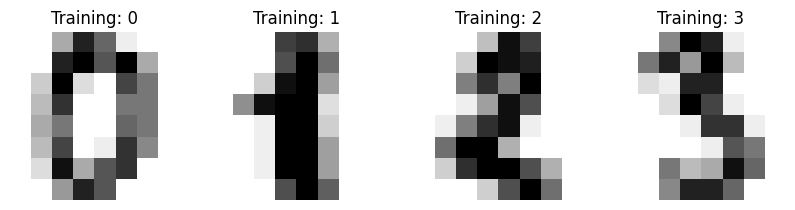

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, _, y_train, _ = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
images = []
X_test = []
y_test = []
predictions = []
for i in range(0,10):
    for j in range(0, 4):
        try:
            #voting = [0] * 10
            img_path = f"{path}/"+str(i)+"/"+str(j)+'.png'
            original_image = Image.open(img_path).convert("L")
            
            for threshold in range(0,255):
                matched = False
                im = cropImage(original_image, threshold)
                
                im = im.resize((8,8))
                image_array = np.asarray(im)
                image_array = abs(255 - image_array)
                
                for k in range(len(image_array)):
                    for l in range(len(image_array)):
                        if image_array[k][l] < threshold:
                            image_array[k][l] = 0

                image_array = image_array//14
                image_array = image_array.reshape((1,-1))
                
                predicted = clf.predict(image_array)
                #voting[list(predicted)[0]] += 1
                if predicted == i:
                    matched = True
                    break
            X_test.append(image_array)
            y_test.append(i)
            predictions.append(list(predicted)[0])
            # predictions.append(voting.index(max(voting)))
            images.append(original_image)
              
        except:
          pass

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



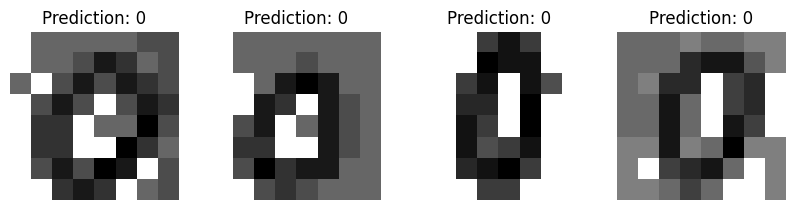

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction, ground_truth in zip(axes, X_test, predictions, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r,)
    ax.set_title(f"Prediction: {prediction}")
    

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         4
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4

    accuracy                           0.93        40
   macro avg       0.96      0.93      0.93        40
weighted avg       0.96      0.93      0.93        40




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 2 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 1 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 4]]


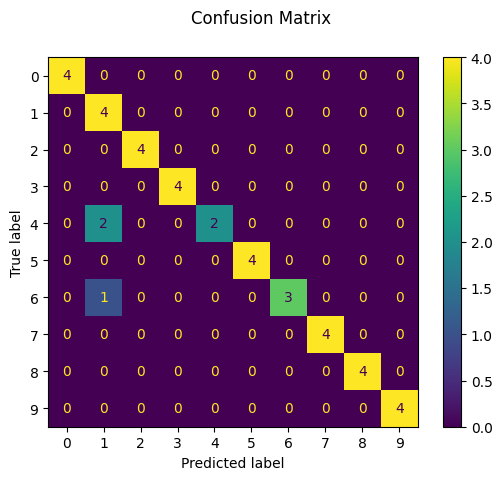

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

If the results from evaluating a classifier are stored in the form of a
`confusion matrix <confusion_matrix>` and not in terms of `y_true` and
`y_pred`, one can still build a :func:`~sklearn.metrics.classification_report`
as follows:



In [ ]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         4
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4

    accuracy                           0.93        40
   macro avg       0.96      0.93      0.93        40
weighted avg       0.96      0.93      0.93        40




In [ ]:
!gdown https://drive.google.com/drive/folders/1Eqtp400xAGqoh0mHFmNlx__to3C_JtK

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1Eqtp400xAGqoh0mHFmNlx__to3C_JtK
To: /content/1Eqtp400xAGqoh0mHFmNlx__to3C_JtK
1.64kB [00:00, 2.85MB/s]
